## Predicting life expectancy using WHO data

In [1]:
# Task 2: Regression
# • Step 1: Loading Data, Data Pre-processing, EDA
# • Step 2: Feature Engineering, Creating Train, and Test Datasets
# • Step 3: Apply at least 4 algorithms (Training and Testing)
# • Step 4: Generate at least 4 Evaluation Metrics on each algorithm.
# • Step 5: Comparing the results.
# • Step 6: Fine Tune the best algorithm.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
dataset = pd.read_csv('Life Expectancy Data.csv')

dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
print("Dataset Shape: ", dataset.shape)
print()
print()
print()

print("Dataset Description: ", dataset.describe())

Dataset Shape:  (2938, 22)



Dataset Description:                Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min

In [4]:
# missing values
missing_values = dataset.isnull().sum()
print("Missing Values: ", missing_values)

Missing Values:  Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [5]:
# Data Pre-processing
dataset.dropna(inplace=True)

dataset.drop(["Country", "Status"], axis=1, inplace=True)

# columns
print("Columns: ", dataset.columns)
print()
print()
print()

numeric_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()



print("Numeric Columns: ", numeric_columns)
print()
print()
print()


categorical_columns = dataset.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical Columns: ", categorical_columns)

Columns:  Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')



Numeric Columns:  ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']



Categorical Columns:  []


In [6]:
# missing values
missing_values = dataset.isnull().sum()
print("Missing Values: ", missing_values)

Missing Values:  Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [7]:
# Calculate correlation coefficients between each feature column and the target column
correlation_with_target = dataset.corr()['Life expectancy ']

# Sort the correlation coefficients in descending order to identify important columns
important_columns = correlation_with_target.abs().sort_values(ascending=False).index
print("Important columns based on correlation with target column:")
print(important_columns)

Important columns based on correlation with target column:
Index(['Life expectancy ', 'Schooling', 'Income composition of resources',
       'Adult Mortality', ' HIV/AIDS', ' BMI ', ' thinness  1-19 years',
       ' thinness 5-9 years', 'GDP', 'percentage expenditure', 'Alcohol',
       'Diphtheria ', 'Polio', 'Hepatitis B', 'under-five deaths ',
       'Total expenditure', 'infant deaths', 'Measles ', 'Year', 'Population'],
      dtype='object')


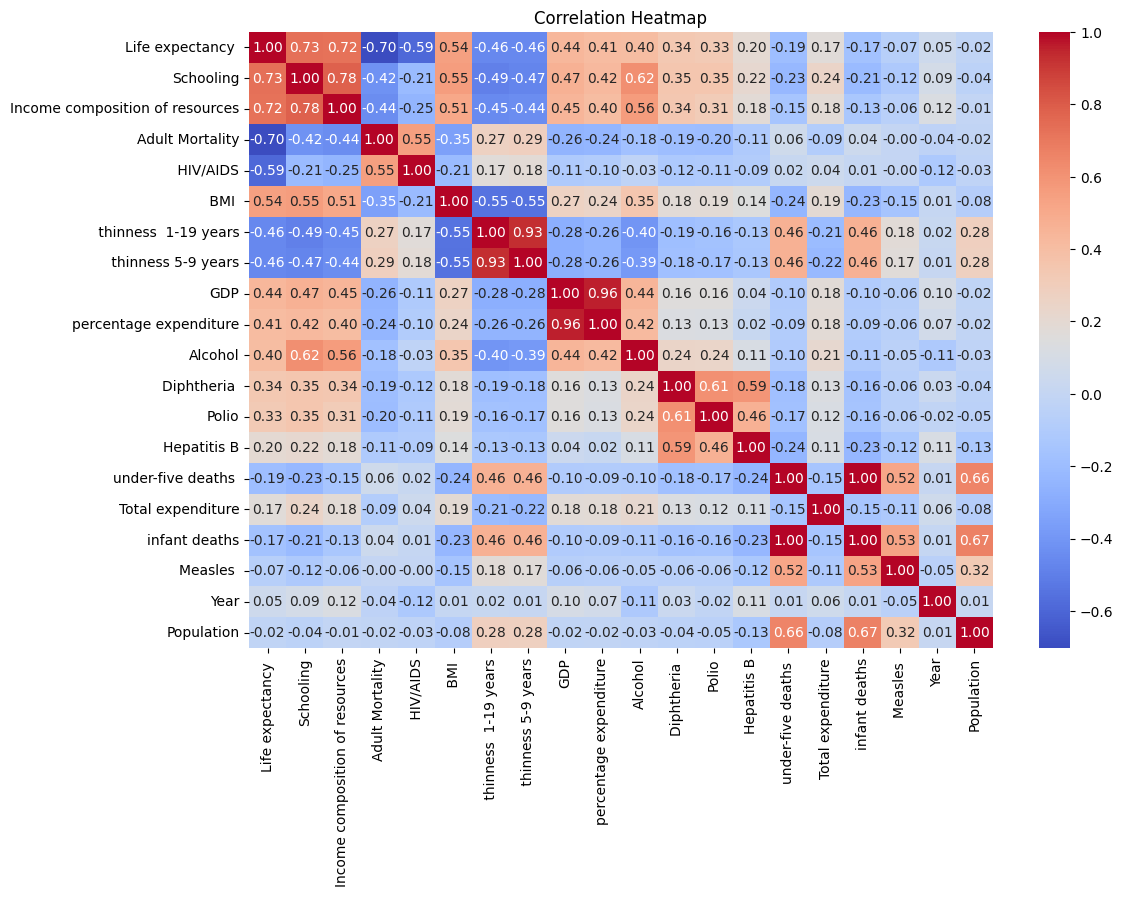

In [8]:
# Pairplot to visualize relationships between important columns
# sns.pairplot(dataset[important_columns], kind='scatter')
# plt.show()

# Heatmap to visualize correlation between important columns
plt.figure(figsize=(12, 8))
sns.heatmap(dataset[important_columns].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# Outlier Pre-processing
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for column in important_columns:
    dataset = remove_outliers(dataset, column)

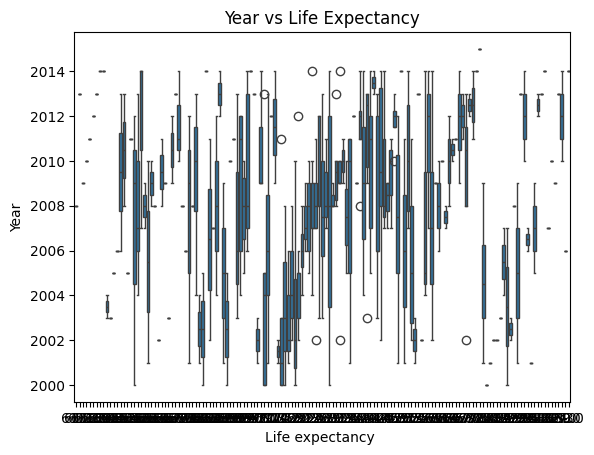

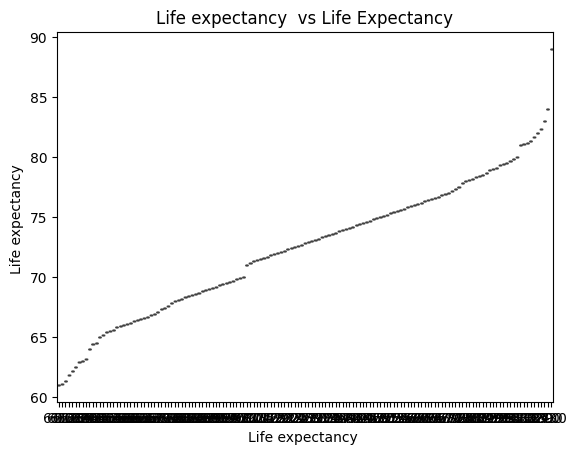

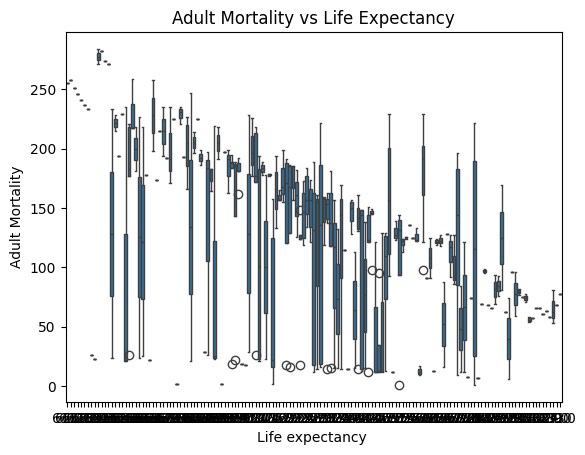

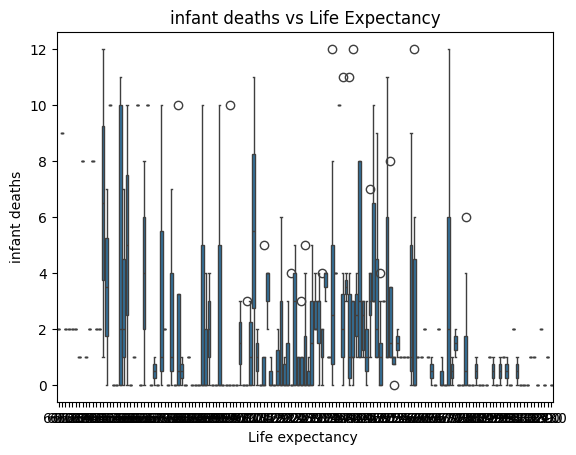

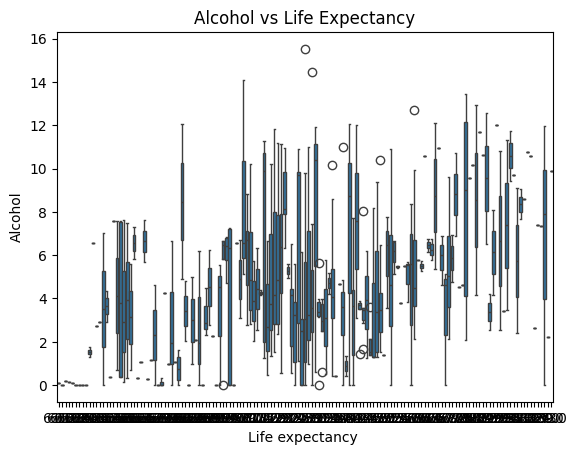

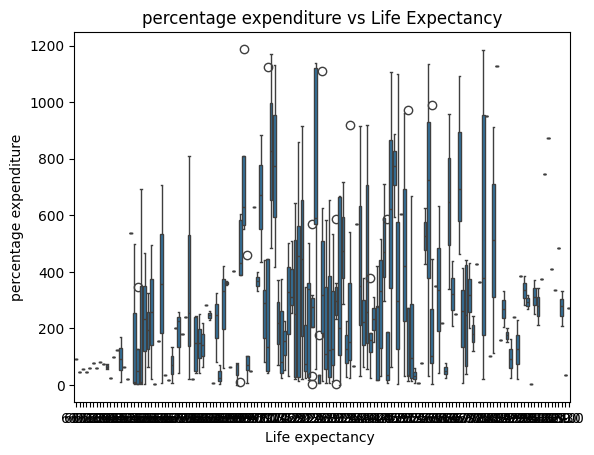

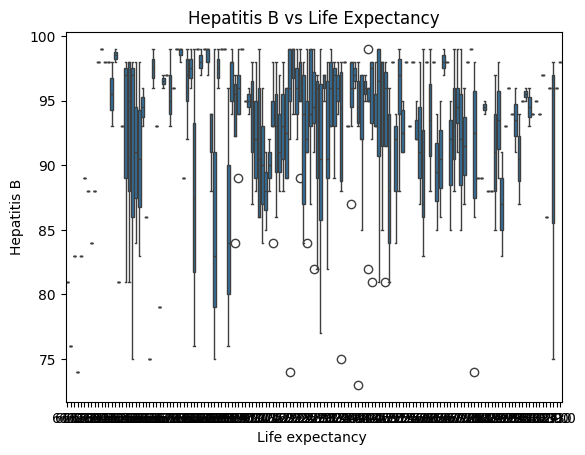

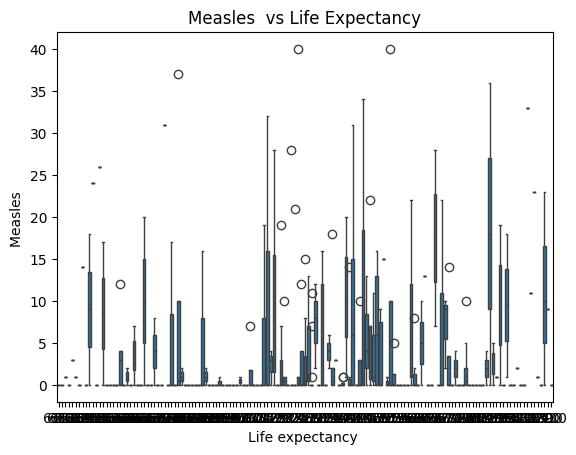

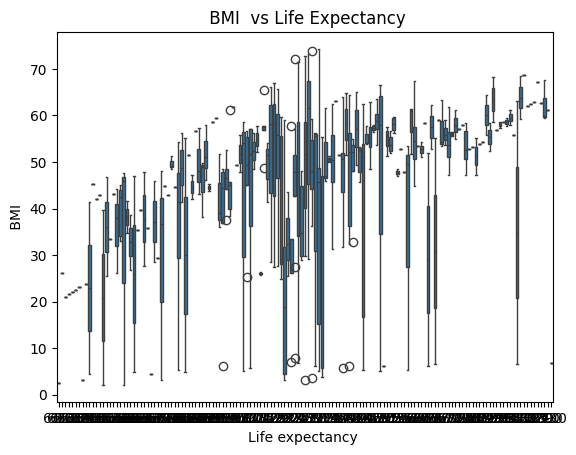

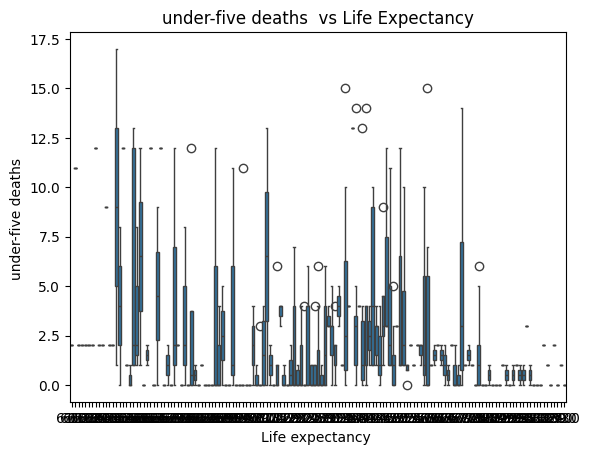

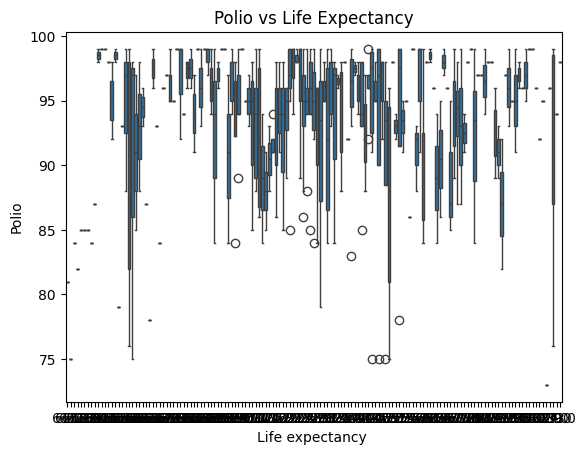

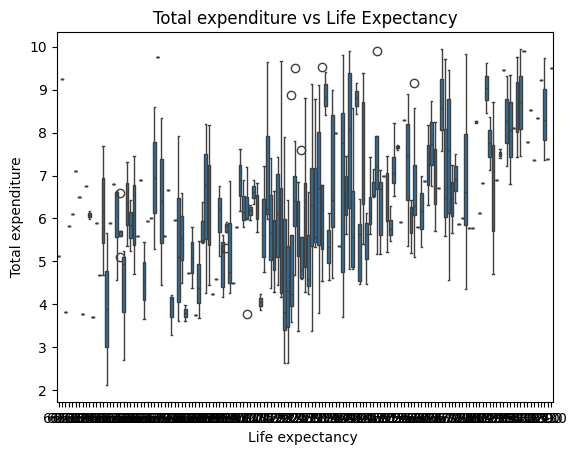

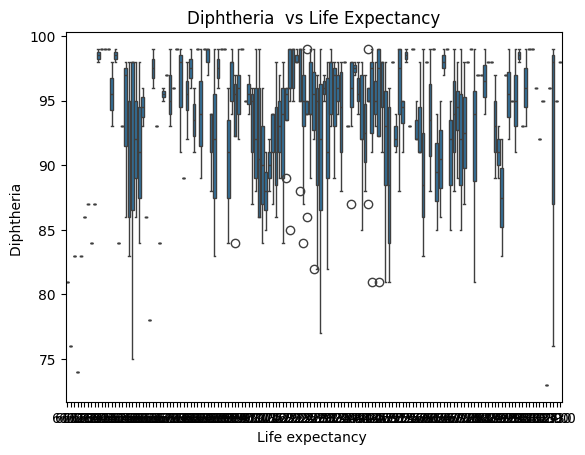

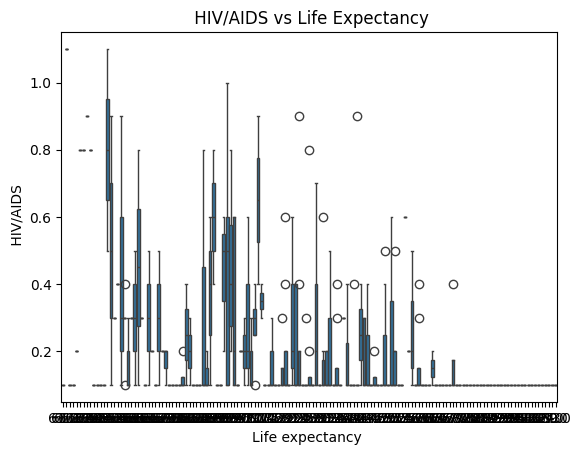

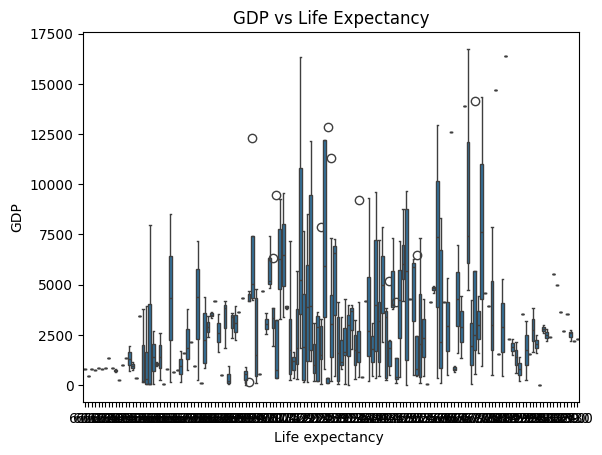

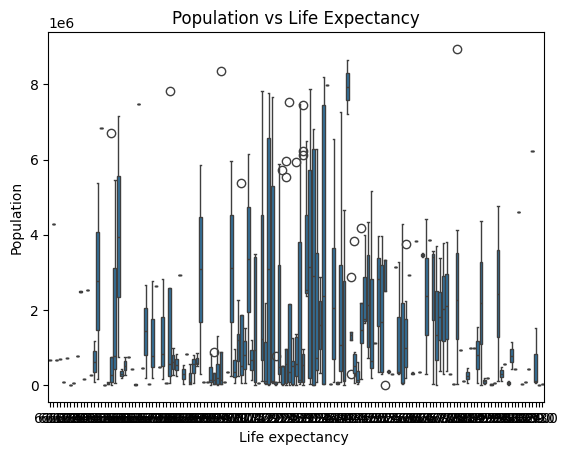

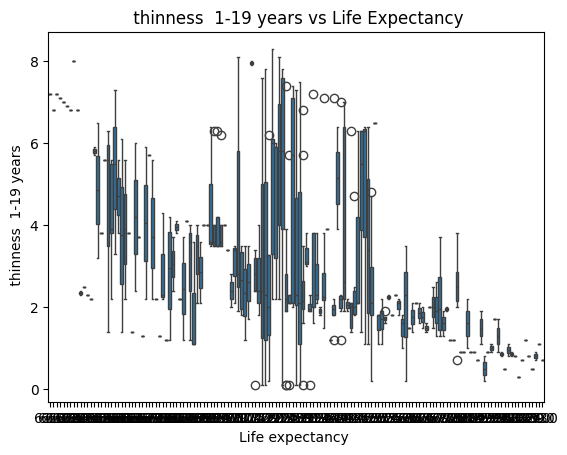

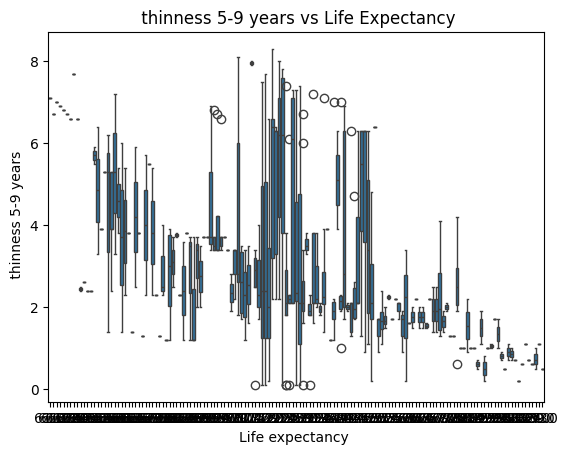

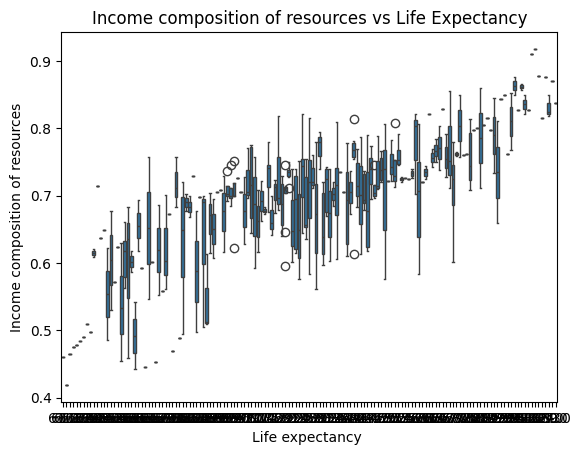

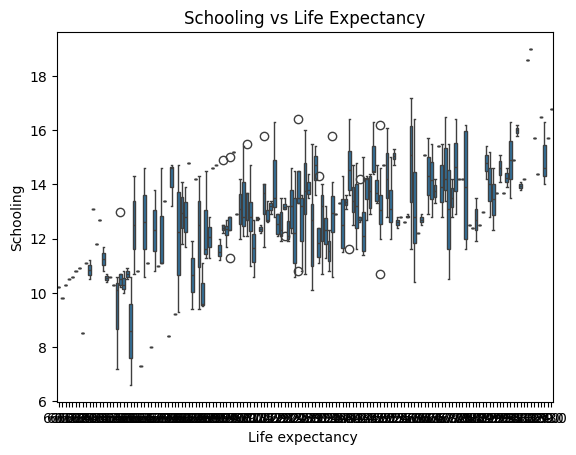

In [10]:
for column in numeric_columns:
	sns.boxplot(x='Life expectancy ', y=column, data=dataset)
	plt.title(f'{column} vs Life Expectancy')
	plt.show()

In [11]:
# unique value counts in the numeric columns
unique_value_counts = {}
for column in numeric_columns:
	# count how many unique values are in a column, do not count the count of each value
	unique_values_count = dataset[column].nunique()
	unique_value_counts[column] = unique_values_count

print(unique_value_counts)

{'Year': 16, 'Life expectancy ': 145, 'Adult Mortality': 155, 'infant deaths': 13, 'Alcohol': 292, 'percentage expenditure': 392, 'Hepatitis B': 24, 'Measles ': 34, ' BMI ': 249, 'under-five deaths ': 17, 'Polio': 23, 'Total expenditure': 291, 'Diphtheria ': 24, ' HIV/AIDS': 11, 'GDP': 392, 'Population': 392, ' thinness  1-19 years': 68, ' thinness 5-9 years': 70, 'Income composition of resources': 221, 'Schooling': 81}


In [12]:
dataset.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.023176,-0.058871,0.055972,-0.198203,0.165857,0.118075,-0.112816,-0.012925,0.060313,0.030670,0.085131,0.050187,0.055196,0.168514,0.066441,0.076170,0.068282,0.040366,0.117500
Life expectancy,0.023176,1.000000,-0.451740,-0.142967,0.359054,0.203613,0.050387,0.082887,0.374178,-0.150675,0.065923,0.402384,0.098245,-0.351198,0.182580,0.040542,-0.460050,-0.452030,0.715812,0.556868
Adult Mortality,-0.058871,-0.451740,1.000000,0.107855,-0.089708,-0.028640,-0.061699,-0.090834,-0.253819,0.109109,-0.057143,-0.220890,-0.083524,0.103674,-0.031687,0.008482,0.149862,0.152342,-0.330520,-0.241842
infant deaths,0.055972,-0.142967,0.107855,1.000000,-0.263507,-0.079798,-0.171565,0.020901,-0.065922,0.991576,-0.140940,0.069465,-0.122798,0.120827,-0.136974,0.350460,-0.067964,-0.071940,-0.245766,-0.196085
Alcohol,-0.198203,0.359054,-0.089708,-0.263507,1.000000,0.188880,0.137493,0.004146,0.215658,-0.245999,0.208340,0.152113,0.226717,-0.127687,0.286586,0.009462,-0.234544,-0.217188,0.553351,0.414900
percentage expenditure,0.165857,0.203613,-0.028640,-0.079798,0.188880,1.000000,0.003010,-0.087707,0.103474,-0.083046,0.010544,0.061608,0.021463,-0.084517,0.731411,0.011225,-0.015583,-0.014097,0.303991,0.263951
Hepatitis B,0.118075,0.050387,-0.061699,-0.171565,0.137493,0.003010,1.000000,0.162895,-0.077162,-0.169283,0.824465,-0.083426,0.873528,-0.126936,0.086126,-0.041863,0.140784,0.151698,0.203738,0.215208
Measles,-0.112816,0.082887,-0.090834,0.020901,0.004146,-0.087707,0.162895,1.000000,0.095766,0.010877,0.086440,0.058533,0.108797,-0.192755,-0.050492,-0.023905,0.034506,0.040081,0.178938,0.155052
BMI,-0.012925,0.374178,-0.253819,-0.065922,0.215658,0.103474,-0.077162,0.095766,1.000000,-0.073262,-0.076267,0.228912,-0.067344,-0.223660,0.142453,0.102910,-0.462220,-0.462418,0.405392,0.350527
under-five deaths,0.060313,-0.150675,0.109109,0.991576,-0.245999,-0.083046,-0.169283,0.010877,-0.073262,1.000000,-0.138914,0.057665,-0.120205,0.142416,-0.139688,0.321435,-0.063892,-0.068290,-0.255377,-0.203561


<Axes: >

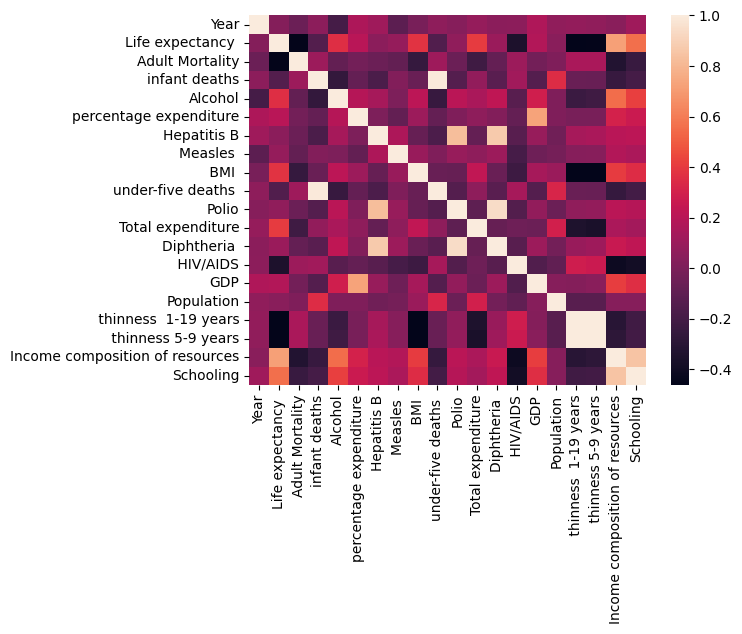

In [13]:
# plot the heatmap
corr = dataset.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [14]:
# Feature Engineering
X = dataset.drop(['Life expectancy '], axis=1)
y = dataset['Life expectancy ']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [15]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 3: Apply at least 4 algorithms (Training and Testing)

In [16]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [18]:
# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [19]:
# Random Forest Regression
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [20]:
# Evaluation Metrics
models = {
    'Linear Regression': linear_reg,
    'Polynomial Regression': poly_reg,
    'Decision Tree Regression': decision_tree_reg,
    'Random Forest Regression': random_forest_reg
}

## Step 4: Generate at least 4 Evaluation Metrics on each algorithm

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

evaluation_metrics = {}

for model_name, model in models.items():
    if model_name == 'Polynomial Regression':
      X_test_poly = poly_features.transform(X_test_scaled)
      y_pred = model.predict(X_test_poly)
    else:
      y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    evaluation_metrics[model_name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R2 Score': r2,
        'Explained Variance Score': evs
    }

print("Evaluation Metrics: ", evaluation_metrics)

Evaluation Metrics:  {'Linear Regression': {'Mean Squared Error': 6.968561934922709, 'Mean Absolute Error': 2.134458185096987, 'R2 Score': 0.7081002280800124, 'Explained Variance Score': 0.7097533702137608}, 'Polynomial Regression': {'Mean Squared Error': 11.108868528394037, 'Mean Absolute Error': 2.0831922870339166, 'R2 Score': 0.53467067954483, 'Explained Variance Score': 0.5357072321523002}, 'Decision Tree Regression': {'Mean Squared Error': 5.807468354430378, 'Mean Absolute Error': 1.3784810126582268, 'R2 Score': 0.7567362242135866, 'Explained Variance Score': 0.7602559381959677}, 'Random Forest Regression': {'Mean Squared Error': 2.7973381265822805, 'Mean Absolute Error': 1.0649620253164567, 'R2 Score': 0.8828248397936482, 'Explained Variance Score': 0.8828298965946006}}


In [22]:
evaluation_metrics

{'Linear Regression': {'Mean Squared Error': 6.968561934922709,
  'Mean Absolute Error': 2.134458185096987,
  'R2 Score': 0.7081002280800124,
  'Explained Variance Score': 0.7097533702137608},
 'Polynomial Regression': {'Mean Squared Error': 11.108868528394037,
  'Mean Absolute Error': 2.0831922870339166,
  'R2 Score': 0.53467067954483,
  'Explained Variance Score': 0.5357072321523002},
 'Decision Tree Regression': {'Mean Squared Error': 5.807468354430378,
  'Mean Absolute Error': 1.3784810126582268,
  'R2 Score': 0.7567362242135866,
  'Explained Variance Score': 0.7602559381959677},
 'Random Forest Regression': {'Mean Squared Error': 2.7973381265822805,
  'Mean Absolute Error': 1.0649620253164567,
  'R2 Score': 0.8828248397936482,
  'Explained Variance Score': 0.8828298965946006}}

## Step 5: Comparing the results.

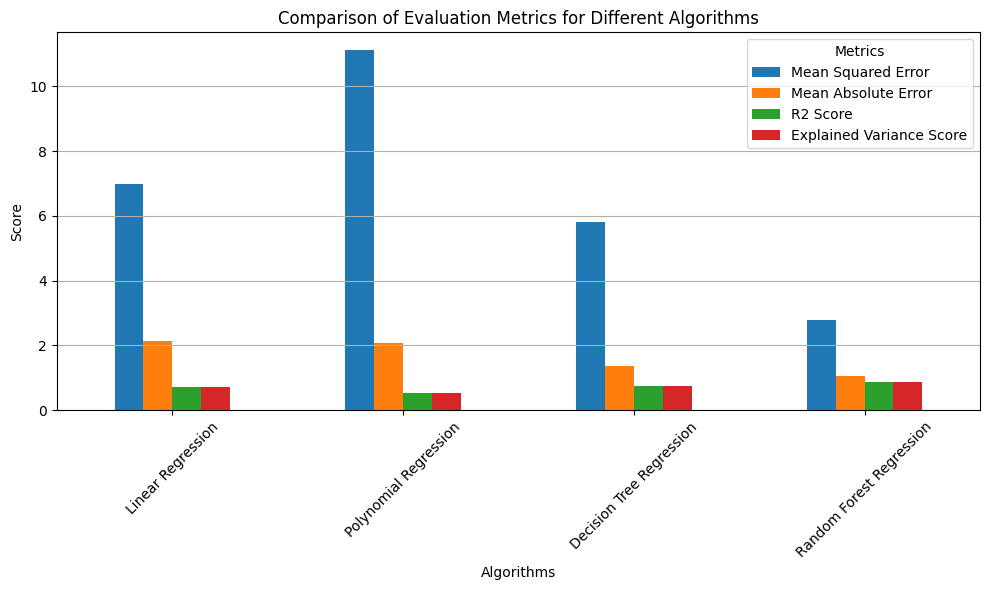

In [23]:
# Visualize the performance of each algorithm
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Evaluation Metrics for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Step 6: Fine Tune the best algorithm.

In [25]:
best_algorithm = max(
    evaluation_metrics,
    key=lambda k: evaluation_metrics[k]['R2 Score']
)
print(f'Best performing algorithm: {best_algorithm}')

Best performing algorithm: Random Forest Regression


In [26]:
from sklearn.model_selection import GridSearchCV

# Fine Tune the best algorithm
param_grid = {
	'n_estimators': [50, 100, 150, 200],
	'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
grid_search = GridSearchCV(
	estimator=random_forest_reg,
	param_grid=param_grid,
	cv=5,
	n_jobs=-1,
	verbose=2
)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f'Best parameters: {best_params}')
print(f'Best score: {best_score}')
print(f'Best model: {best_model}')
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
print(f'Explained Variance Score: {evs}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.3s
[CV] END .....................max_depth=10, n_estimators=150; total time=   0.3s
[CV] END .....................max_depth=10, n_e